In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
data = pd.read_csv('data/cleanup/Shunyi.csv', index_col=['date'])
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7


In [3]:
# convert index to datetime object
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='date', length=35064, freq=None)

date
2013-03-01 00:00:00     NW
2013-03-01 01:00:00     NW
2013-03-01 02:00:00     NW
2013-03-01 03:00:00     NW
2013-03-01 04:00:00     NW
2013-03-01 05:00:00    NNW
2013-03-01 06:00:00    NNE
2013-03-01 07:00:00     NE
2013-03-01 08:00:00    NNW
2013-03-01 09:00:00    SSW
2013-03-01 10:00:00    NNW
2013-03-01 11:00:00    NNW
2013-03-01 12:00:00     NE
2013-03-01 13:00:00     NE
2013-03-01 14:00:00    ENE
2013-03-01 15:00:00     NE
2013-03-01 16:00:00    NNE
2013-03-01 17:00:00    NNW
2013-03-01 18:00:00     NW
2013-03-01 19:00:00      N
2013-03-01 20:00:00     NE
2013-03-01 21:00:00    ENE
2013-03-01 22:00:00    ENE
2013-03-01 23:00:00     NE
Name: wd, dtype: object


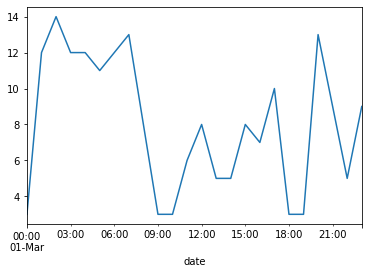

In [4]:
# explore relationship between wind speed and PM2.5 
df_daily1 = data[data.index.strftime('%Y-%m-%d') == '2013-03-01']
print(df_daily1['wd'])
df_daily1['PM2.5'].plot()

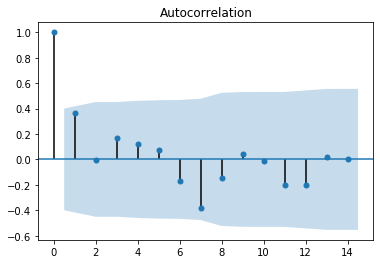

In [5]:
# exam the Autocorrelation of PM2.5

from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(df_daily1['PM2.5'])
plt.show()

## Preprocessing---how to calculate change rate of PM2.5 (μg.m3-1/hour)

In [6]:
# One our prediction seems like a reasonable choice

'''
Modify the data accoring to EDA, drop 'wd', drop na, turn temperature and dew point into RH(relative humidity)
calculate one houre PM2.5 change rate
'''
import math

# drop 'wd' first
data.drop(columns=['wd'], inplace=True)
# convert temperature/dew point into RH
data['RH'] = data.apply(lambda x: math.exp(17.27*x.DEWP/(237.7+x.DEWP)-17.27*x.TEMP/(237.7+x.TEMP)), axis=1)
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,RH
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3,0.209222
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4,0.197983
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,8.6,0.178054
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,6.6,0.178550
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,4.5,0.189187
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8,0.188669
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5,0.238267
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,1.7,0.199573


In [7]:
# now we can drop the TEMP and DEWP
data_new = data.drop(columns=['TEMP', 'DEWP'])
data_new


# # correction 1
# # try not do convertion to RH
# data_new = data.copy()
# data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH
date,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,1026.2,0.0,8.6,0.178054
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,1027.3,0.0,6.6,0.178550
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,1027.7,0.0,4.5,0.189187
...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,1014.6,0.0,1.7,0.199573


In [8]:
# here we shift 1 to obtain 1 hour PM2.5 change rate
data_new['PM1hour'] = data_new['PM2.5'].shift(periods=-1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour
date,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,1026.2,0.0,8.6,0.178054,12.0
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,1027.3,0.0,6.6,0.178550,12.0
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,1027.7,0.0,4.5,0.189187,11.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,1014.6,0.0,1.7,0.199573,18.0


In [9]:
# 1 hour PM2.5 change rate
data_new['PM2.5Change'] = data_new.apply(lambda x: x.PM1hour - x['PM2.5'] if ((not pd.isna(x.PM1hour)) and (not pd.isna(x['PM2.5']))) else np.nan, axis=1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,1026.2,0.0,8.6,0.178054,12.0,-2.0
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,1027.3,0.0,6.6,0.178550,12.0,0.0
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,1027.7,0.0,4.5,0.189187,11.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,1014.6,0.0,1.7,0.199573,18.0,0.0


In [10]:
# how many rows that we don't have data?

data_new[data_new['PM2.5Change'].isna()]

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-09 11:00:00,76.0,764.0,59.0,66.0,1500.0,90.0,1003.6,0.0,9.7,0.159041,NaN,NaN
2013-03-09 12:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1006.6,0.0,9.9,0.129068,NaN,NaN
2013-03-09 13:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1009.0,0.0,7.6,0.139415,NaN,NaN
2013-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1010.4,0.0,6.2,0.129010,NaN,NaN
2013-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1011.7,0.0,5.9,0.128784,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-21 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1027.8,0.0,3.6,0.530891,59.0,NaN
2017-02-23 15:00:00,4.0,6.0,3.0,14.0,200.0,87.0,1022.8,0.0,3.5,0.179029,NaN,NaN
2017-02-23 16:00:00,NaN,NaN,2.0,14.0,300.0,84.0,1022.5,0.0,3.9,0.169685,NaN,NaN


In [11]:
# drop NA now 
data_new.dropna(inplace=True)
# data_new.drop(columns=['PM2.5','PM1hour'], inplace=True)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,12.0,1.0
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,13.0,1.0
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,8.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,27.0,12.0
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0


## Bayesian inference

### Our model
$$PM_{2.5} =Background + \sum_{i=0}^5 \alpha_ix_i(x_1=RH,x_2=windspeed,x_3=CO,x_4=NO,x_5=SO_2)$$

In [12]:
# see our data
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,12.0,1.0
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,13.0,1.0
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,8.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,27.0,12.0
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0


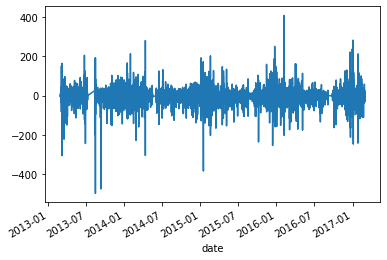

In [13]:
data_new['PM2.5Change'].plot()

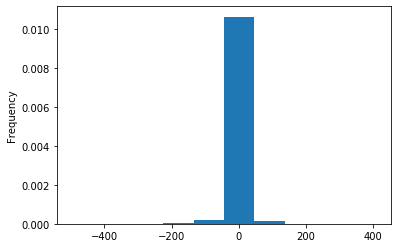

In [14]:
data_new['PM2.5Change'].plot.hist(density=True)

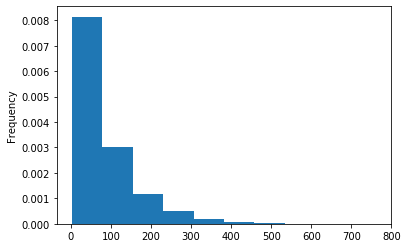

In [15]:
data_new['PM2.5'].plot.hist(density=True)

In [16]:
# # RELU for rain
# def relu(x):
#     return np.array([max(0.0, i-10.0) for i in x])

In [17]:
# def wind(x):
#     return np.array([ i-2.0 for i in x])

In [18]:
# we don't model the rain now, drop if rain
data_new = data_new[data_new['RAIN'] == 0]
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,12.0,1.0
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,13.0,1.0
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,8.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,27.0,12.0
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0


In [19]:
import math
# log_pm2.5
data_new['log_pm25'] = data_new.apply(lambda x: math.log(x['PM2.5']), axis=1)
data_new

/Users/conan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change,log_pm25
date,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0,1.098612
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0,2.484907
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,12.0,1.0,2.397895
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,13.0,1.0,2.484907
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,8.0,-5.0,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,27.0,12.0,2.708050
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0,3.295837
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0,3.850148


In [41]:
# we assume that the change rate is a normal distribution and its expectation mu follows our model

# # x1:PM10
# X1 = data_new['PM10'].to_numpy()
# # x2:windspeed
# X2 = data_new['WSPM'].to_numpy()
# # x3:RH
# X3 = data_new['RH'].to_numpy()
# # x4:SO2
# X4 = data_new['SO2'].to_numpy()
# # x5:NO2
# X5 = data_new['NO2'].to_numpy()
# # x6:CO
# X6 = data_new['CO'].to_numpy()


# x1:PM10
X1 = data_new['PM10'].to_numpy()
# x2:RH
X2 = data_new['RH'].to_numpy()
# x3:SO2
X3 = data_new['SO2'].to_numpy()
# x4:NO2
X4 = data_new['NO2'].to_numpy()
# x5:CO
X5 = data_new['CO'].to_numpy()

# observation
Y = data_new['PM2.5'].to_numpy()

In [42]:
Y

array([ 3., 12., 11., ..., 47., 18., 18.])

In [43]:
X1.shape 

(29297,)

In [47]:
import pymc3 as pm

with pm.Model() as pm25_model:
    alpha1 = pm.Normal('alpha1', mu=0, sd=10)
    alpha2 = pm.Normal('alpha2', mu=0, sd=10)
    alpha3 = pm.Normal('alpha3', mu=0, sd=10)
    alpha4 = pm.Normal('alpha4', mu=0, sd=10)
    alpha5 = pm.Normal('alpha5', mu=0, sd=10)
    c = pm.Normal('c', mu=0, sd=10)
    
    sigma = pm.HalfCauchy('sigma', beta=30)
    
    mu = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + alpha4 * X4 + alpha5 * X5 + c
    
    #'Y_obs', mu=mu, sd=sigma, observed=Y
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [48]:
with pm25_model:
    trace = pm.sample(3000, tune=1500, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, c, alpha5, alpha4, alpha3, alpha2, alpha1]
Sampling 2 chains: 100%|██████████| 9000/9000 [04:28<00:00, 33.58draws/s]


In [49]:
with pm25_model:
    posterior_predictive = pm.sample_posterior_predictive(trace)
    prior = pm.sample_prior_predictive()

100%|██████████| 6000/6000 [00:19<00:00, 313.36it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a203e8090>,
      dtype=object)

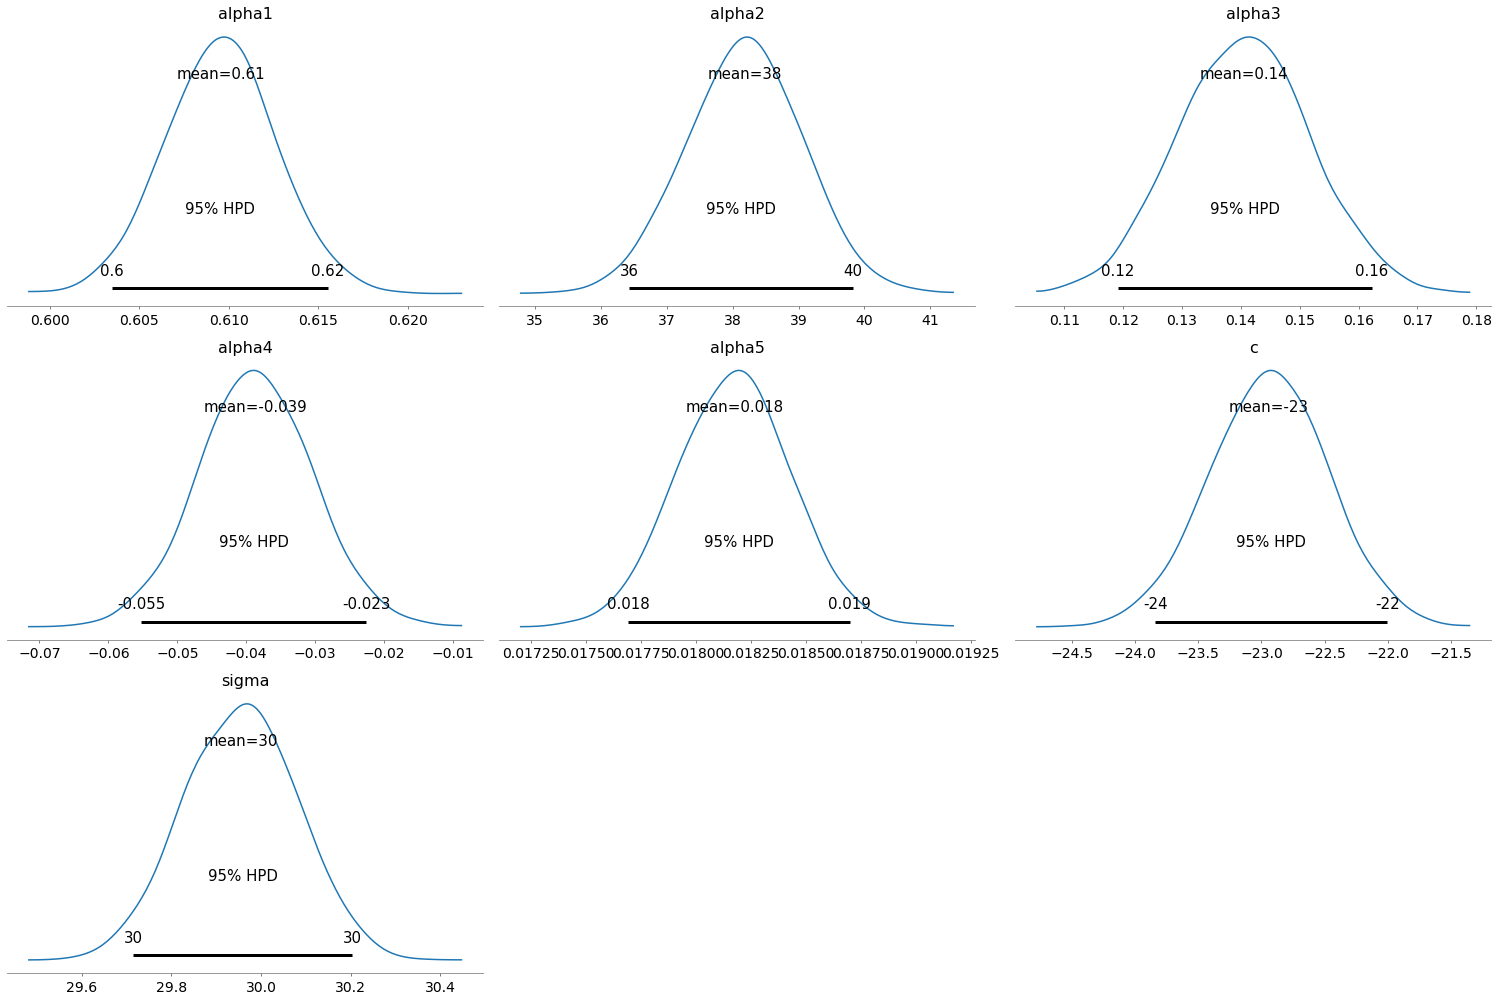

In [50]:
import arviz as az

with pm25_model:
    data = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)
    
az.plot_posterior(data, round_to=2, credible_interval=0.95)

In [26]:
def delta(X1, X2, X3, X4, X5):
    return 0.61 * X1 + 38 * X2 + 0.14 * X3 - 0.039 * X4 + 0.018 * X5 - 23


In [27]:
data_new['prediction'] = data_new.apply(lambda x: delta(x.PM10, x.RH, x.SO2, x.NO2, x.CO), axis=1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change,prediction,error
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0,-5.881551,1.372816
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0,-2.609648,0.134137
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,12.0,1.0,-4.592865,0.235715
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,13.0,1.0,-0.798159,0.016820
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,8.0,-5.0,-1.866778,0.143598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,27.0,12.0,13.080328,0.738689
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0,40.021404,0.963756
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0,38.430157,0.094259


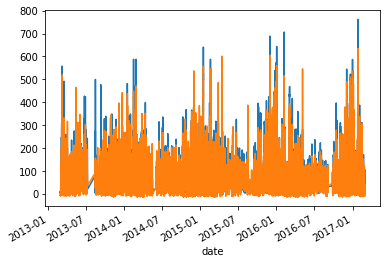

In [28]:
data_new['PM2.5'].plot()
data_new['prediction'].plot()

In [29]:
error2 = sum([(data_new['PM2.5'][i]-data_new['prediction'][i])**2 for i in range(0,30347)])
error2

27039733.21118023

In [30]:
data_new['error'] = data_new.apply(lambda x: abs(x['PM2.5']-x['prediction'])/x['PM2.5'], axis=1)
data_new[data_new['error'] < 0.25].shape[0]

15346

In [31]:
data_new['error'].describe()

count    30347.000000
mean         0.550454
std          1.141666
min          0.000015
25%          0.113322
50%          0.246551
75%          0.594257
max         59.221920
Name: error, dtype: float64

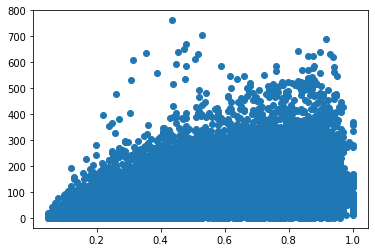

In [80]:
plt.plot(X2, Y, marker='o', linestyle='none')

In [10]:
df_daily2 = data_new[data_new.index.strftime('%Y-%m-%d') == '2013-06-24']
df_daily2

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-06-24 00:00:00,90.0,96.0,3.0,43.0,800.0,107.0,1000.2,0.0,1.2,0.788898,96.0,6.0
2013-06-24 01:00:00,96.0,98.0,3.0,42.0,800.0,87.0,999.6,0.0,1.2,0.827860,221.0,125.0
2013-06-24 02:00:00,221.0,226.0,4.0,49.0,1700.0,55.0,999.3,0.0,1.5,0.918195,427.0,206.0
2013-06-24 03:00:00,427.0,226.0,4.0,57.0,3200.0,33.0,999.6,0.0,1.3,0.958083,369.0,-58.0
2013-06-24 04:00:00,369.0,312.0,3.0,55.0,3200.0,29.0,999.6,0.0,2.3,1.000000,360.0,-9.0
2013-06-24 05:00:00,360.0,306.0,3.0,53.0,3000.0,22.0,999.9,0.0,1.4,1.000000,292.0,-68.0
2013-06-24 06:00:00,292.0,215.0,3.0,28.0,2399.0,46.0,1000.3,0.0,1.6,0.987919,268.0,-24.0
2013-06-24 07:00:00,268.0,192.0,3.0,28.0,2399.0,46.0,1000.6,0.0,1.5,0.930084,261.0,-7.0
2013-06-24 08:00:00,261.0,190.0,3.0,27.0,2000.0,60.0,1000.8,0.0,1.6,0.860390,252.0,-9.0
